In [32]:
# Fix randomness and hide warnings
seed = 42
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Series
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.rc('font', size=16)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [8]:
# Load Data

categories = np.load("training_dataset/categories.npy")
training_data = np.load("training_dataset/training_data.npy")
valid_periods = np.load("training_dataset/valid_periods.npy")

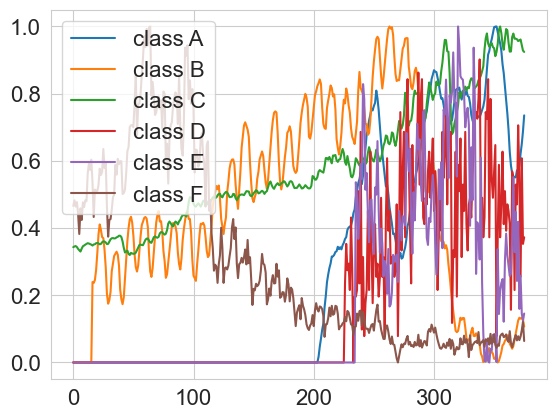

In [9]:
# Visualize one timeseries example for each class in the dataset.

plt.figure()
for c in np.unique(categories):
    c_x_train = training_data[categories == c]
    plt.plot(c_x_train[random.randrange(len(c_x_train))][2400:], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

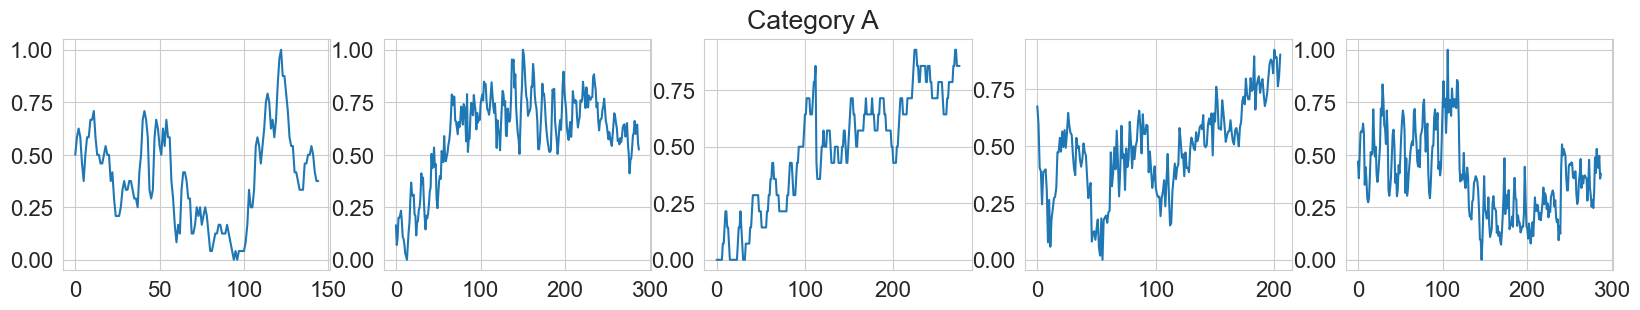

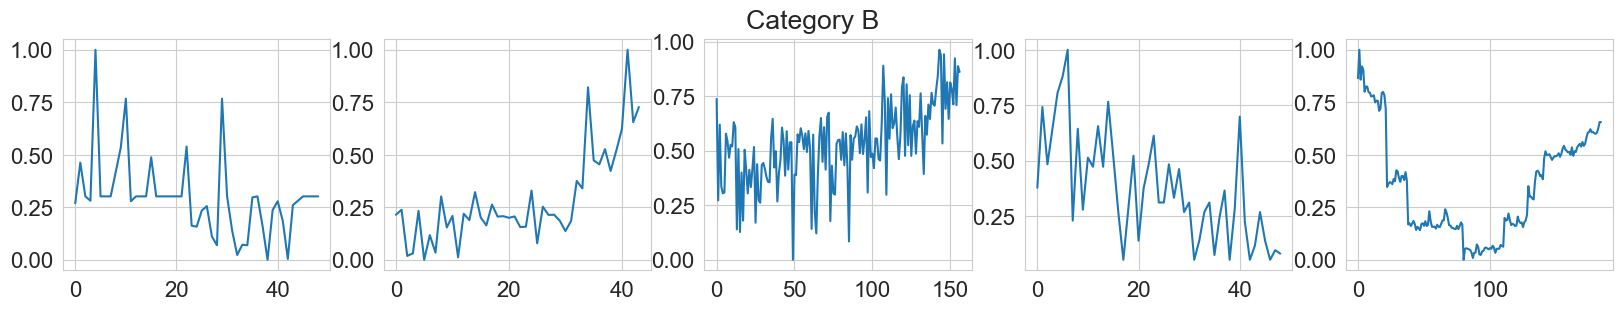

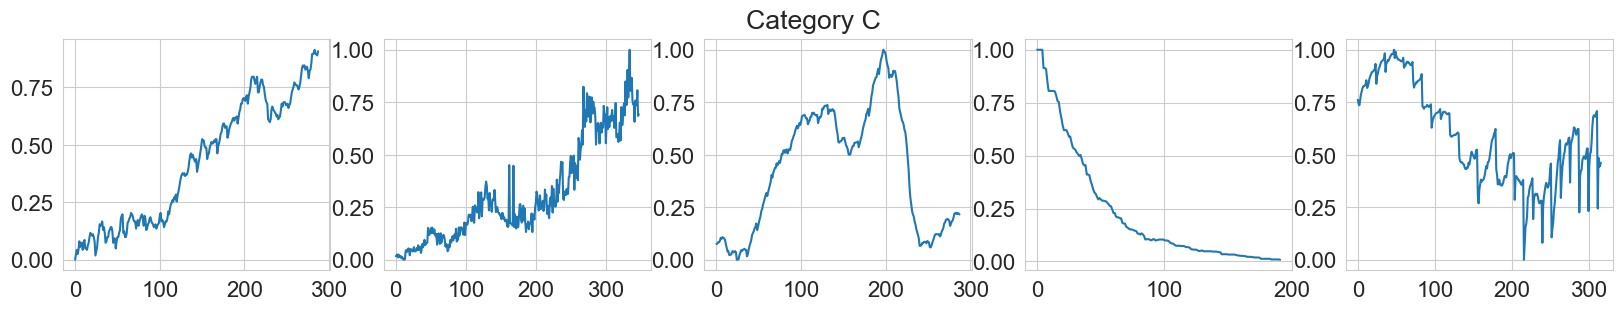

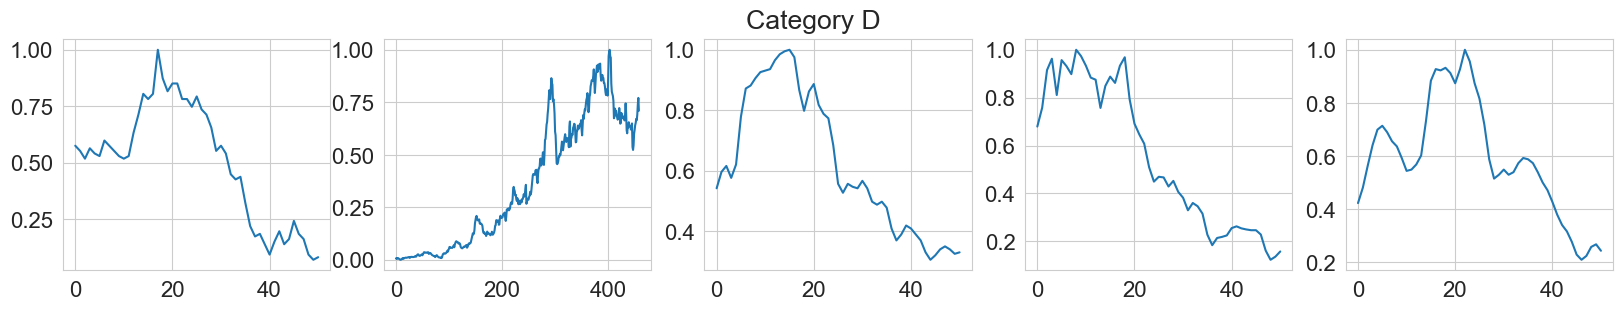

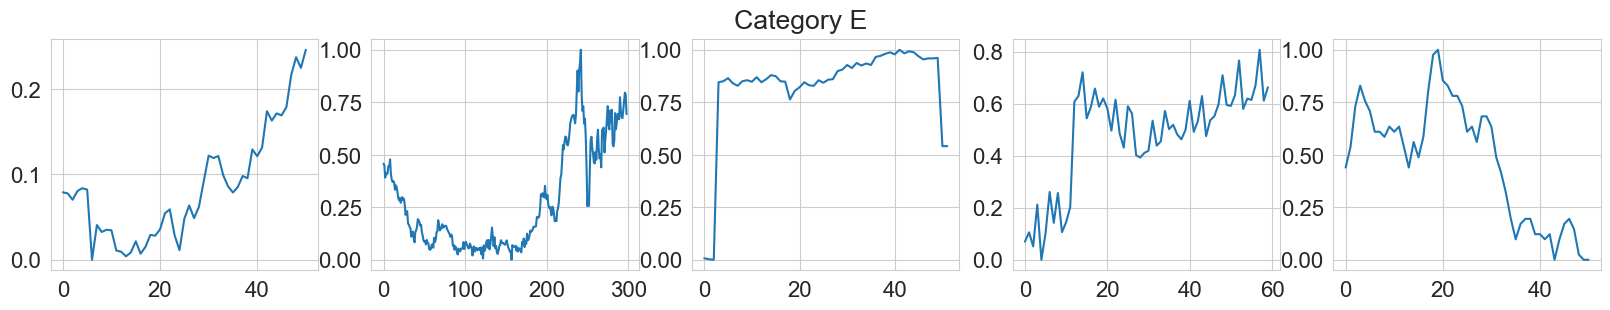

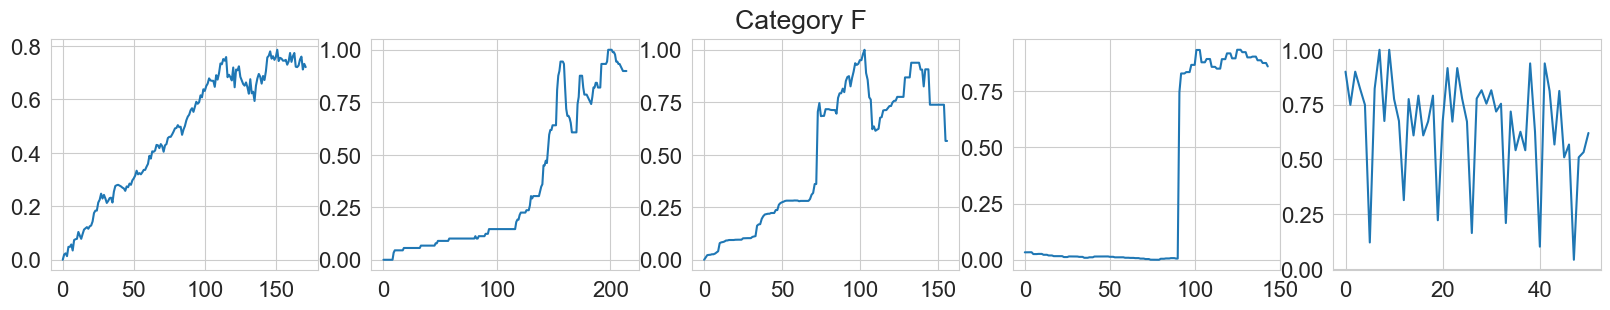

In [40]:
# Visualize some timeseries example for each class

for c in np.unique(categories):
    n_samples = 5
    fig, axs = plt.subplots(1, n_samples, figsize=(20, 3))
    timeseries = training_data[categories==c]
    periods = valid_periods[categories==c]
    fig.suptitle("Category " + c)
    for i in range(n_samples):
        index = random.randrange(len(timeseries))
        axs[i].plot(timeseries[index][periods[index, 0] : periods[index, 1]])
    plt.show()
    plt.close()

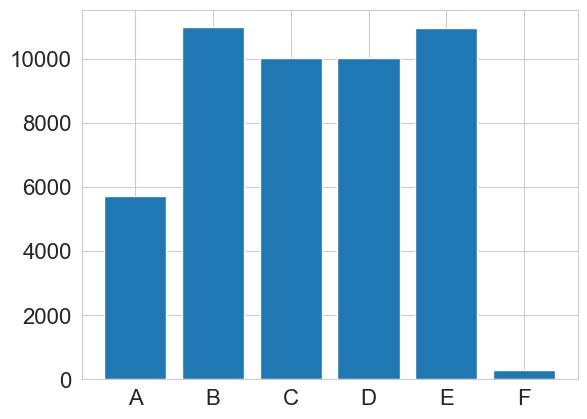

[ 5728 10987 10017 10016 10975   277]


In [11]:
# Classes and quantities

classes, quantities = np.unique(categories, return_counts=True)
plt.figure()
plt.bar(classes, quantities)
plt.show()
plt.close()
print(quantities)

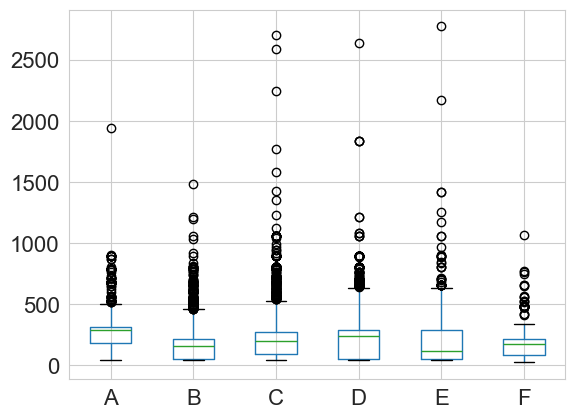

In [18]:
# Durations

plt.figure()
durations = pd.DataFrame()
for c in np.unique(categories):
    dur = pd.DataFrame(valid_periods[categories == c, 1] - valid_periods[categories == c, 0], columns=[c])
    durations = pd.concat([durations, dur], axis=1)
durations.boxplot()
plt.show()
plt.close()

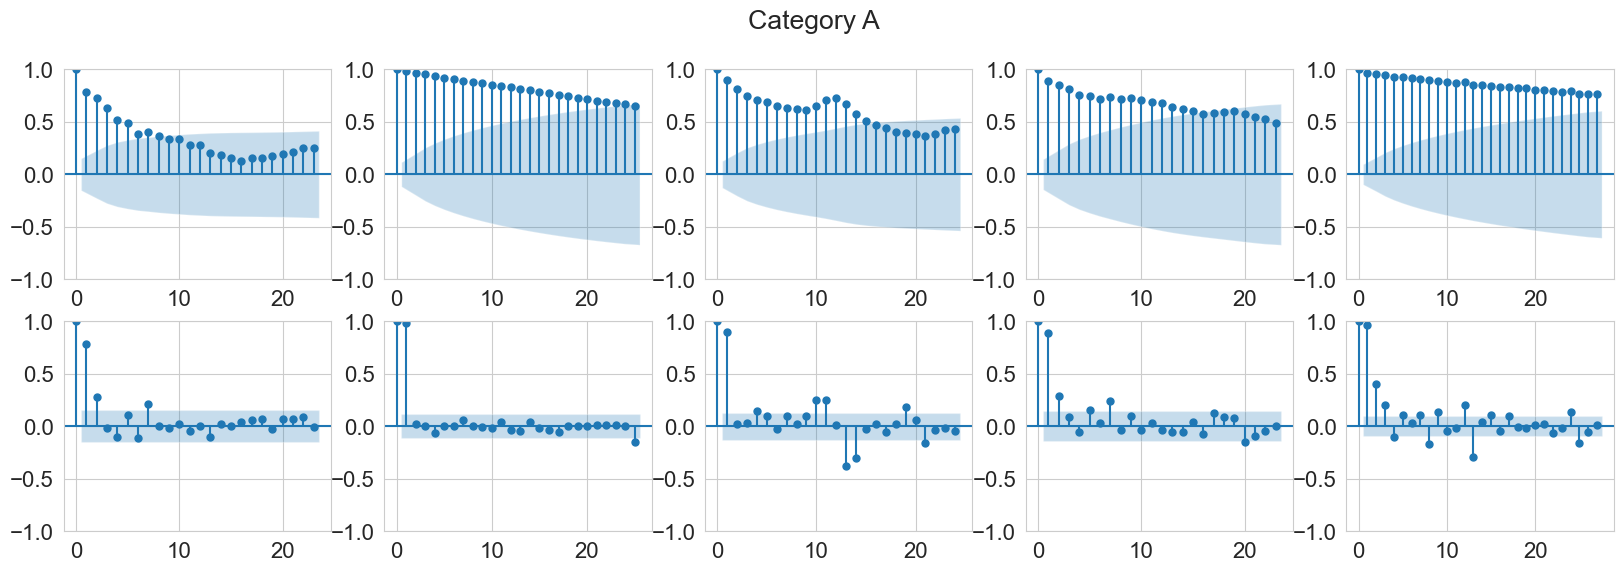

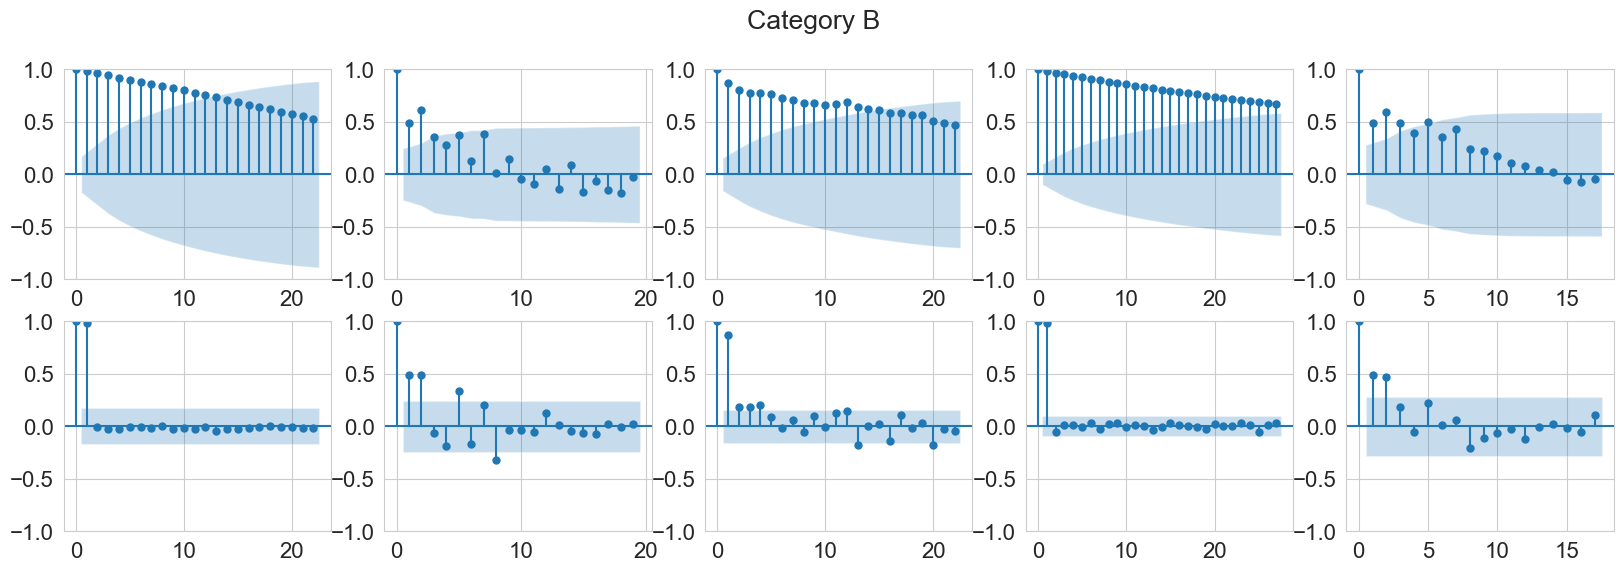

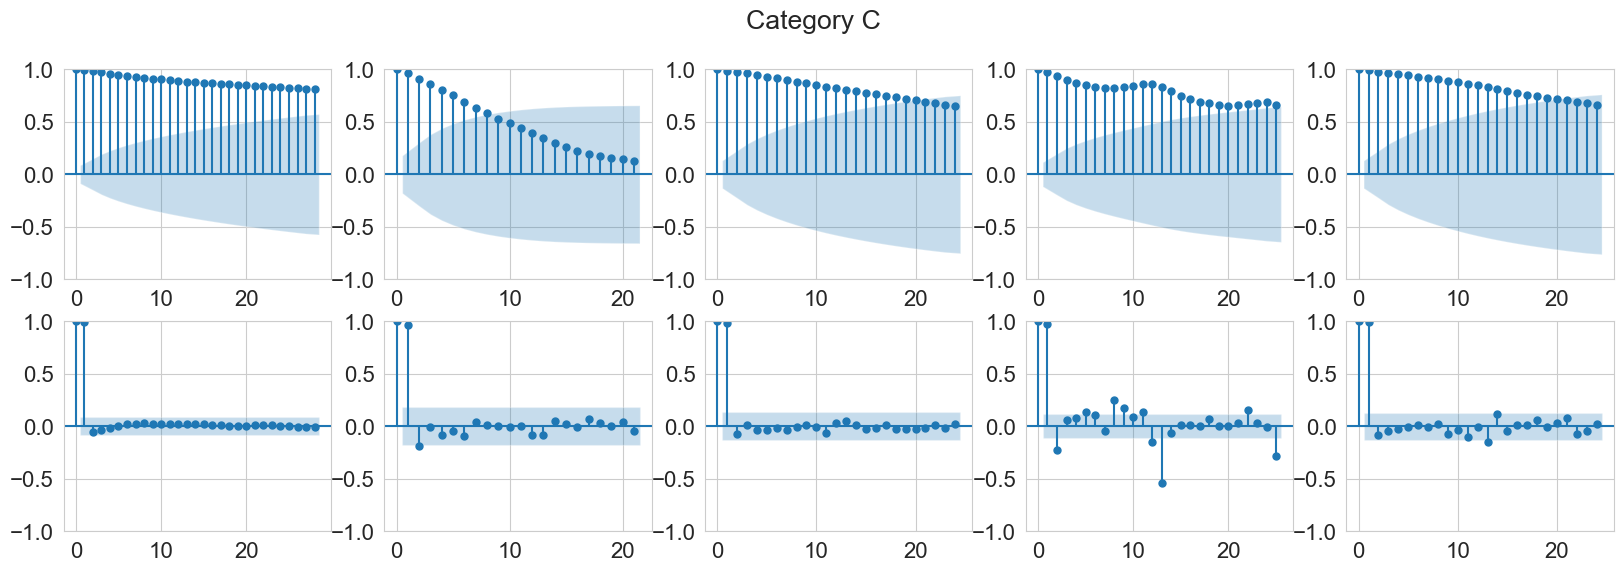

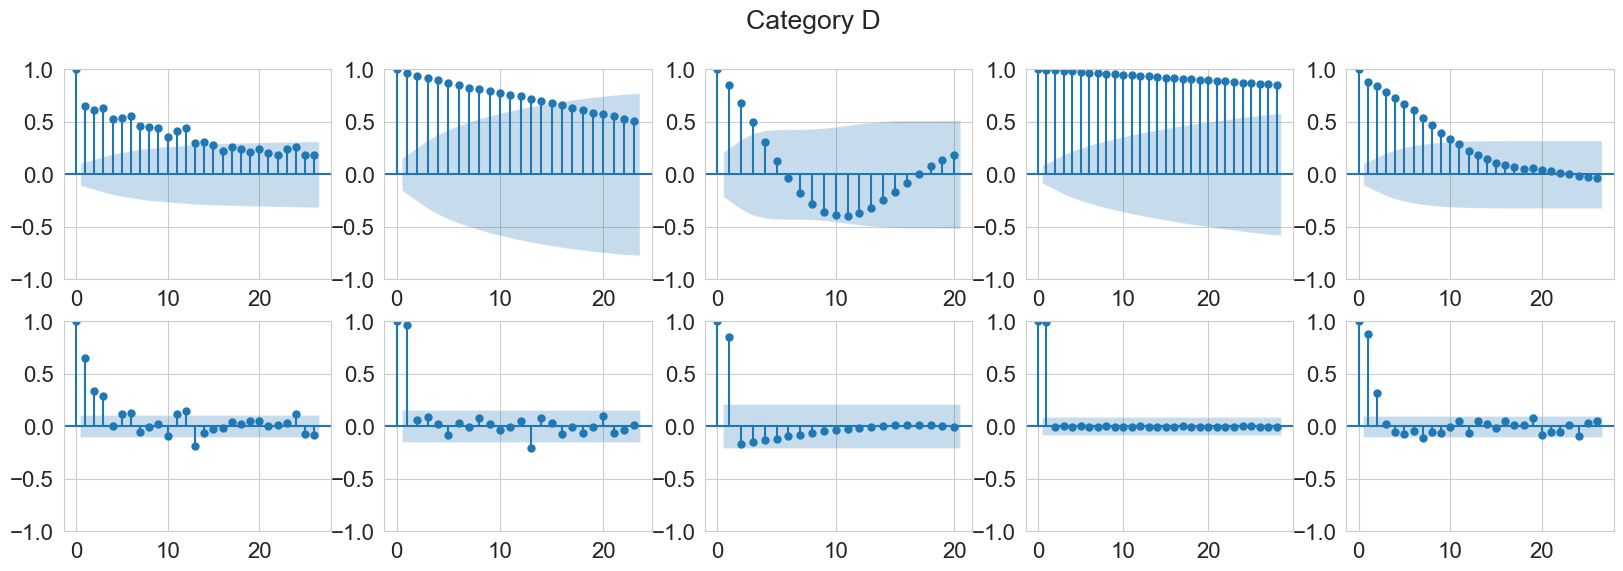

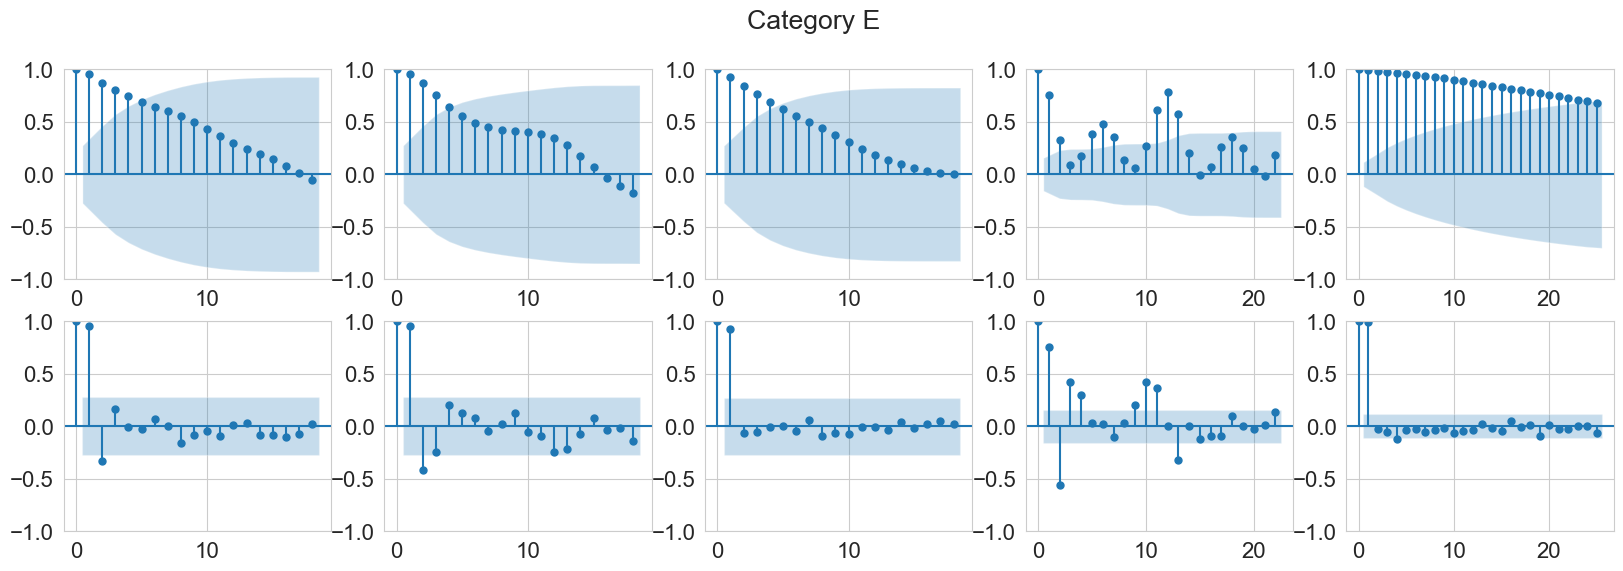

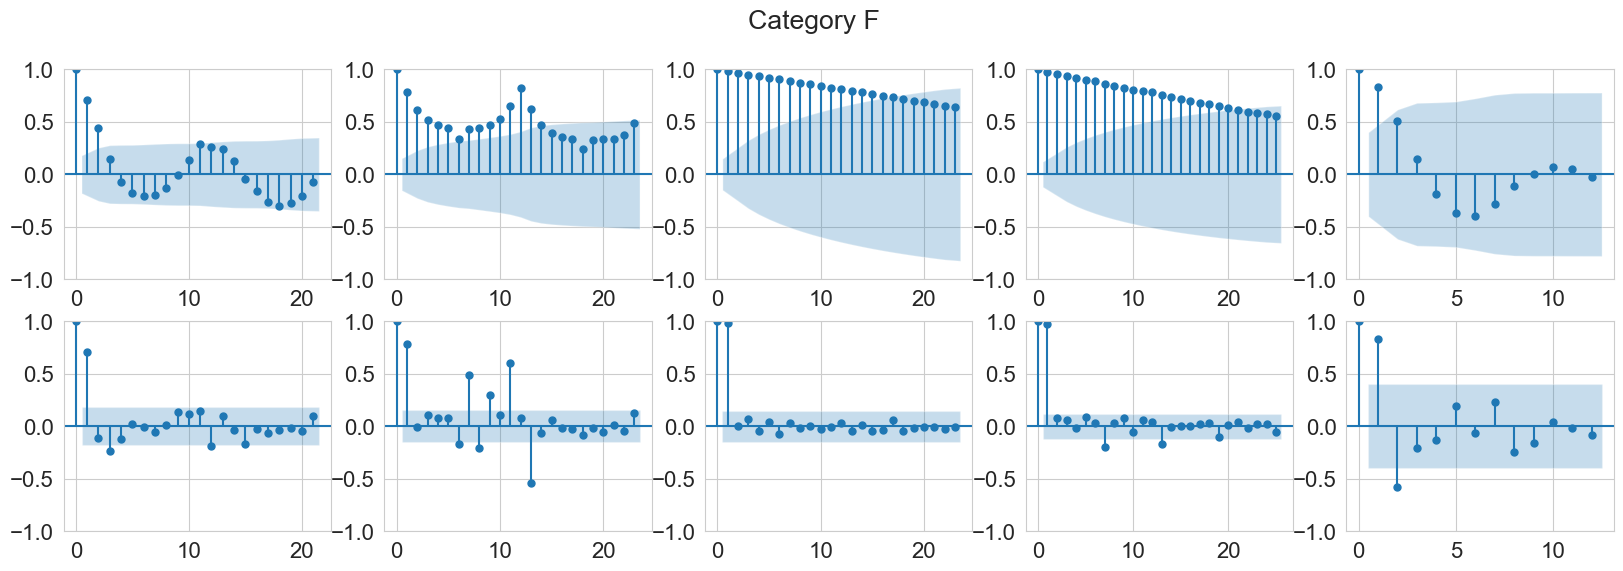

In [39]:
# Autocorrelation

for c in np.unique(categories):
    n_samples = 5
    fig, axs = plt.subplots(2, n_samples, figsize=(20, 6))
    timeseries = training_data[categories==c]
    periods = valid_periods[categories==c]
    fig.suptitle("Category " + c)
    for i in range(n_samples):
        index = random.randrange(len(timeseries))
        plot_acf(timeseries[index][periods[index, 0] : periods[index, 1]], ax=axs[0, i], title='')
        plot_pacf(timeseries[index][periods[index, 0] : periods[index, 1]], ax=axs[1, i], title='')
    plt.show()
    plt.close()